# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading Dataset

In [3]:
# Load dataset
data_path = 'sample_data/twitter_training.csv'

df = pd.read_csv(data_path, header=None, names=['id', 'name', 'label', 'message'])

In [4]:
df.shape

(74682, 4)

In [5]:
df.head()

,id,name,label,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Preprocessing

### 1- First Drop useless columns

In [6]:
df.drop(['id', 'name'], axis = 1, inplace = True)

In [7]:
df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### 2- Remove null values

In [8]:
# See where the null values
df.isnull().sum()

,0
label,0
message,686


In [9]:
# Remove the null rows
df.dropna(inplace = True)

In [10]:
df.shape

(73996, 2)

### 3- Make the text LowerCase

In [11]:
df['message'] = df['message'].str.lower()

In [12]:
df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### 4- Remove URLs (using Regax)

In [13]:

def remove_urls(text):
    import re

    url_pattern = r"https?://\S+|www\.\S+"
    return re.sub(url_pattern, "", text)

In [14]:
df['message'] = df['message'].apply(remove_urls)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### 5 - Remove `Punctuation` and `Special characters`

In [15]:

def remove_special_characters(text):
    import re

    special_characters_pattern = r'[^\w\s]'
    return re.sub(special_characters_pattern, "", text)

In [16]:
df['message'] = df['message'].apply(remove_special_characters)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### 6-Remove stop words

In [17]:
def remove_stopwords_spacy(text):
    import spacy

    nlp = spacy.load("en_core_web_sm")

    doc = nlp(text)
    filtered_text = " ".join(token.text for token in doc if not token.is_stop)
    return filtered_text

In [ ]:
df['message'] = df['message'].apply(remove_stopwords_spacy)

df.head()

### 7-Remove Emoji

In [21]:
def remove_emojis(text):
    import emoji

    return emoji.demojize(text)

In [22]:
df['message'] = df['message'].apply(remove_emojis)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### 8 - Lemmatization

In [23]:
def lemmatize_text(text):
    import spacy

    nlp = spacy.load("en_core_web_sm")

    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [25]:
df['message'] = df['message'].apply(lemmatize_text)

df.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [26]:

# Text preprocessing function
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text

    text = text.lower()  # 1️⃣ Convert to lowercase
    text = remove_urls(text)  # 2️⃣ Remove URLs
    text = remove_special_characters(text)  # 3️⃣ Remove punctuation
    # text = remove_stopwords_spacy(text)  # 4️⃣5️⃣ Remove stopwords
    text = remove_emojis(text)  # 5️⃣ Remove emojis
    # text = lemmatize_text(text)  # 6️⃣ Lemmatization

    return text

In [41]:
df['message'] = df['message'].apply(clean_text)

In [42]:
df.head()

,label,message
0,1,im getting on borderlands and i will murder yo...
1,1,i am coming to the borders and i will kill you...
2,1,im getting on borderlands and i will kill you all
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...


In [43]:
# Test Pre-Processing
check_text = "Ramadan Kareem!! ❤️ https://abcde.com"
cleaned_text = clean_text(check_text)
print(cleaned_text)

ramadan kareem  


In [28]:


# Convert sentiment labels to binary (1: Positive, 0: Negative)
df = df[df['label'].isin(['Positive', 'Negative'])]
df['label'] = df['label'].map({'Positive': 1, 'Negative': 0})

df['message'] = df['message'].apply(clean_text)

<ipython-input-28-7d153b6e8848>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'Positive': 1, 'Negative': 0})


In [29]:
df.head()

,label,message
0,1,im getting on borderlands and i will murder yo...
1,1,i am coming to the borders and i will kill you...
2,1,im getting on borderlands and i will kill you all
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...


In [30]:
df.isnull().values.any()

np.False_

In [31]:
df.shape

(43013, 2)

In [32]:
df.head()

,label,message
0,1,im getting on borderlands and i will murder yo...
1,1,i am coming to the borders and i will kill you...
2,1,im getting on borderlands and i will kill you all
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...


In [33]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

## Embedding Layer

In [34]:
# Tokenization and padding
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

## Training the Model RNN

In [35]:
# Build RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Train model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

Epoch 1/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.5018 - loss: 0.7198 - val_accuracy: 0.5192 - val_loss: 0.6939
Epoch 2/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 77s 72ms/step - accuracy: 0.5040 - loss: 0.7018 - val_accuracy: 0.5191 - val_loss: 0.6923
Epoch 3/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 77s 72ms/step - accuracy: 0.5102 - loss: 0.6949 - val_accuracy: 0.4883 - val_loss: 0.6966
Epoch 4/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.5073 - loss: 0.6943 - val_accuracy: 0.5118 - val_loss: 0.6926
Epoch 5/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 88s 78ms/step - accuracy: 0.5120 - loss: 0.6934 - val_accuracy: 0.5121 - val_loss: 0.6924


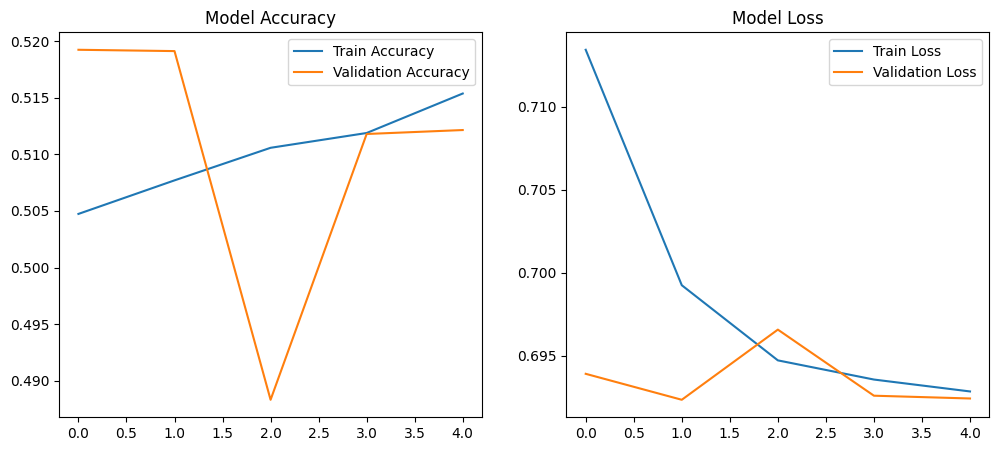

In [38]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [39]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5059 - loss: 0.6925
Accuracy: 51.21%


## Testing

In [40]:
# Test predictions
sample_tweets = ["I love this product!", "no one like that"]
sample_seq = tokenizer.texts_to_sequences(sample_tweets)
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')
predictions = model.predict(sample_pad)
for tweet, pred in zip(sample_tweets, predictions):
    sentiment = 'Positive' if pred > 0.5 else 'Negative'
    print(f'Tweet: {tweet} | Sentiment: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Tweet: I love this product! | Sentiment: Positive
Tweet: no one like that | Sentiment: Negative
